<a href="https://colab.research.google.com/github/hsuani0824/tibame_python/blob/main/web_spider_get.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# import urllib.request as request
from urllib import request
import json
import pandas as pd

dirname = "web spider"
if not os.path.exists(dirname):
    os.mkdir(dirname)

# url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK&limit=50"
# f = request.urlopen(url);
# contents = json.load(f)
# url = f"https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK&limit={contents['data']['totalCount']}"

url = f"https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK"
f = request.urlopen(url);
contents = json.load(f)
print(contents["data"]["totalCount"])

new_text = ""
# (不建議! 用pandas做better!)自己做csv
for content in contents["data"]["danmu"]:
    new_text += f"'{content.get('userid')}', '{content.get('text')}'\n"

with open(dirname + "/" + "danmuCsv.csv", "w", encoding="utf-8") as file:
    file.write("userid, text\n")
    file.write(new_text)
# 用pandas存
dataframe = pd.DataFrame(contents["data"]["danmu"])
dataframe.to_csv(dirname + "/" + "danmuPdCsv.csv", encoding="utf-8")

rd_df = pd.read_csv(dirname + "/" + "danmuPdCsv.csv", index_col=0)
print(rd_df)

# 存json
with open(dirname + "/" + "danmuJson.json", "w", encoding="utf-8") as file:
    json.dump(contents, file, ensure_ascii=False, indent=4)


499
        text    color  size  position  time        sn        userid
0         二刷  #FFFFFF     1         0     0  42903755    qaz1210731
1      吉依好可愛  #FFFFFF     1         0     5  40580321  KingOrange69
2         哈嘍  #FFFFFF     1         0     5  40657118       rwan123
3          簽  #FFFFFF     1         0     5  41446388      nehsh101
4          1  #FFFFFF     1         0     5  42235007     zxc520031
..       ...      ...   ...       ...   ...       ...           ...
494      ZMB  #FFFFFF     1         0   877  42527612       ZED8090
495  兄弟有事請轉身  #FFFFFF     1         0   890  44754781      D0690422
496        😀  #00C3FC     1         0   898  40894473     kekerry75
497   沒了？？？？  #FFFFFF     1         0   901  42188563        linzzi
498        哈  #FF0026     1         0   901  44529579     st5109185

[499 rows x 7 columns]


In [ ]:
df = pd.read_csv(dirname + "/" + "danmuPdCsv.csv", index_col=0)
# 只列"userid", "text"列資料
df[["userid", "text"]]

# 過濾操作: 帶入([])跟你資料筆數依樣多的True/False
# True: 留下 False: 刪除
fil = [True, False, True]
# head(前幾行?)
df.head(3)[fil]

,text,color,size,position,time,sn,userid
0,二刷,#FFFFFF,1,0,0,42903755,qaz1210731
2,哈嘍,#FFFFFF,1,0,5,40657118,rwan123


In [ ]:
counts = df["userid"].value_counts()
counts

,count
userid,
st5109185,10
annana566,7
g840483938,6
kateihan0307,5
vicky220,4
...,...
Roubert,1
torappub70,1
angel1joanne,1


In [ ]:
query_id = "st5109185"
# 過濾操作: 帶入([])跟你資料筆數依樣多的True/False
# True: 留下 False: 刪除
filter = df["userid"] == query_id
df[filter]

,text,color,size,position,time,sn,userid
34,二刷,#FFFFFF,1,0,59,44529553,st5109185
74,好可愛,#FFFFFF,1,0,114,44529401,st5109185
95,8,#FFFFFF,1,0,133,44529558,st5109185
191,烏薩奇寶貝,#FFFFFF,1,0,323,44529406,st5109185
234,哇,#FFFFFF,1,0,400,44529562,st5109185
273,好想吃,#FFFFFF,1,0,480,44529563,st5109185
312,西,#00FF91,1,0,549,44529412,st5109185
411,西西不西西,#FFFFFF,1,0,717,44529568,st5109185
488,诶,#FF0026,1,0,866,44529573,st5109185
498,哈,#FF0026,1,0,901,44529579,st5109185


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '(-0.901, 90.1]'),
  Text(1, 0, '(90.1, 180.2]'),
  Text(2, 0, '(180.2, 270.3]'),
  Text(3, 0, '(270.3, 360.4]'),
  Text(4, 0, '(360.4, 450.5]'),
  Text(5, 0, '(450.5, 540.6]'),
  Text(6, 0, '(540.6, 630.7]'),
  Text(7, 0, '(630.7, 720.8]'),
  Text(8, 0, '(720.8, 810.9]'),
  Text(9, 0, '(810.9, 901.0]')])

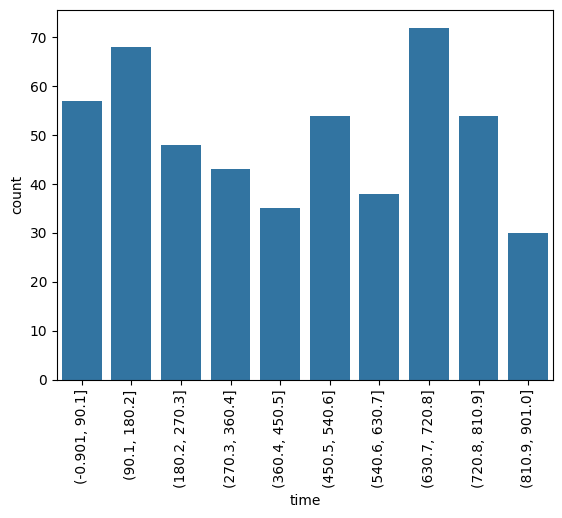

In [ ]:
# seaborn 是以 matplotlib為基礎
import seaborn as sns
import matplotlib.pyplot as plt

# bins=切成幾段?
df_cut = pd.cut(df["time"], bins=10)
# 製作數量圖
sns.countplot(x=df_cut)
# x軸資料轉90度
plt.xticks(rotation = 90)

In [ ]:
# and->&  or->|
# 過濾時間段在 450.5~540.6
filter = (df["time"] >= 450.5) & (df["time"] <= 540.6)
df[filter]

,text,color,size,position,time,sn,userid
251,我朋友射了,#FF0026,1,1,455,44035504,Bro0201
252,兔子好鬧🤣🤣可愛,#FFFFFF,1,0,460,41452694,nina766335
253,鬆餅，你好香( 。ớ ₃ờ)ھ,#FFFFFF,1,0,463,43683890,annana566
254,人類：手機先吃,#FFFFFF,1,0,463,43683900,annana566
255,這食物這算不算SM,#FFFFFF,1,0,463,43683911,annana566
256,呀哈,#FFFFFF,1,0,464,43703781,schy90503
257,磅！,#FDE53D,1,2,465,37363800,chenwenxin
258,兄弟 想趴你,#FFFFFF,1,0,465,37912091,thffhrherh5
259,為什麼要拍？,#FFFFFF,1,0,465,40271978,Bananaaa
260,真的好療癒,#FF9496,2,0,466,42934909,yuyan5831


<Response [200]>
